In [4]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.data_exploration.data_exploration import *
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [11]:
train_data = np.load( './data/train_test/train_data_lgb.npy')
test_data = np.load( './data/train_test/test_data_lgb.npy')
train_target = np.load( './data/train_test/train_target_lgb.npy')
test_target = np.load( './data/train_test/test_target_lgb.npy')

In [17]:
model = lgb.Booster(model_file='./model/lgb_model_2.json')

In [19]:
test_pred = model.predict(test_data)
print(metrics.mean_absolute_percentage_error(test_target,test_pred),
      metrics.mean_absolute_error(test_target,test_pred),
      metrics.r2_score(test_target,test_pred))

0.14879230754246395 67775.079167479 0.8960966926897521


In [20]:
test_target = test_target.reshape(len(test_target),1)
test_pred = test_pred.reshape(len(test_pred),1)

In [21]:
data = np.concatenate((test_target,test_pred),axis=1)
data = pd.DataFrame(data, columns=["y", "yhat"])

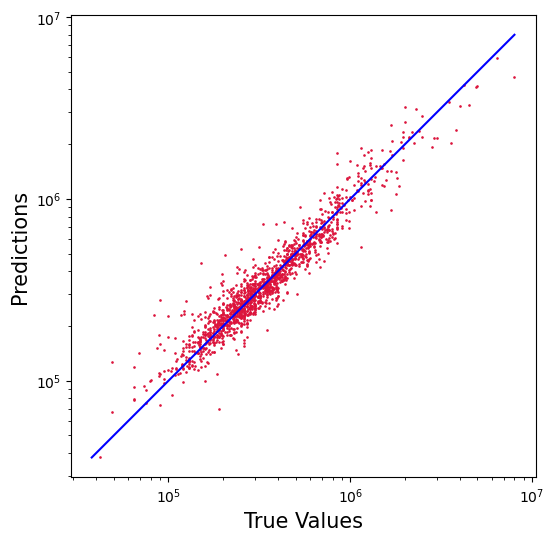

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(data['y'], data['yhat'], c='crimson',s = 0.8)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(data['yhat']), max(data['y']))
p2 = min(min(data['yhat']), min(data['y']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()